# Módulo 30 - K-Means
**Atividade:**

Nesta tarefa, vamos explorar o algoritmo de clustering K-means aplicado a um contexto diferente do usual. Em vez de segmentar perfis de viajantes ou clientes de e-commerce, vamos usar dados biológicos para segmentar diferentes espécies de pinguins com base em características físicas. Esta abordagem destaca a versatilidade do K-means para diversas áreas além de vendas e marketing.

A base de dados utilizada é a penguins do pacote seaborn, que contém informações sobre três espécies de pinguins: Adelie, Chinstrap e Gentoo. As variáveis disponíveis incluem medições físicas dos pinguins coletadas na Antártica.

species: Espécie do pinguim (Adelie, Chinstrap, Gentoo)

island: Ilha onde o pinguim foi observado (Biscoe, Dream, Torgersen)

bill_length_mm: Comprimento do bico em milímetros

bill_depth_mm: Profundidade do bico em milímetros

flipper_length_mm: Comprimento da barbatana em milímetros

body_mass_g: Massa corporal em gramas

sex: Sexo do pinguim (Male, Female)

year: Ano em que a observação foi feita

In [15]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [16]:
penguins = sns.load_dataset('penguins')

In [17]:
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

# 1 - Nesse exercício vocês devem verificar se temos variáveis missing, faltantes e excluir esses valores do dataset, também devem excluir as colunas com valores categóricos, que não utilizazam para o Kmeans.

In [18]:
# Verificando valores nulos e tipos de dados
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [19]:
penguins.dropna(inplace=True)

In [20]:
# Excluindo colunas categóricas
penguins_clean = penguins.select_dtypes(include=['float64', 'int64'])

# 2 - Visualize a análise descritiva dos seus dados utilizando a função vista em aula pairplot. É possível já identificar possíveis agrupamentos? Se sim, quantos?

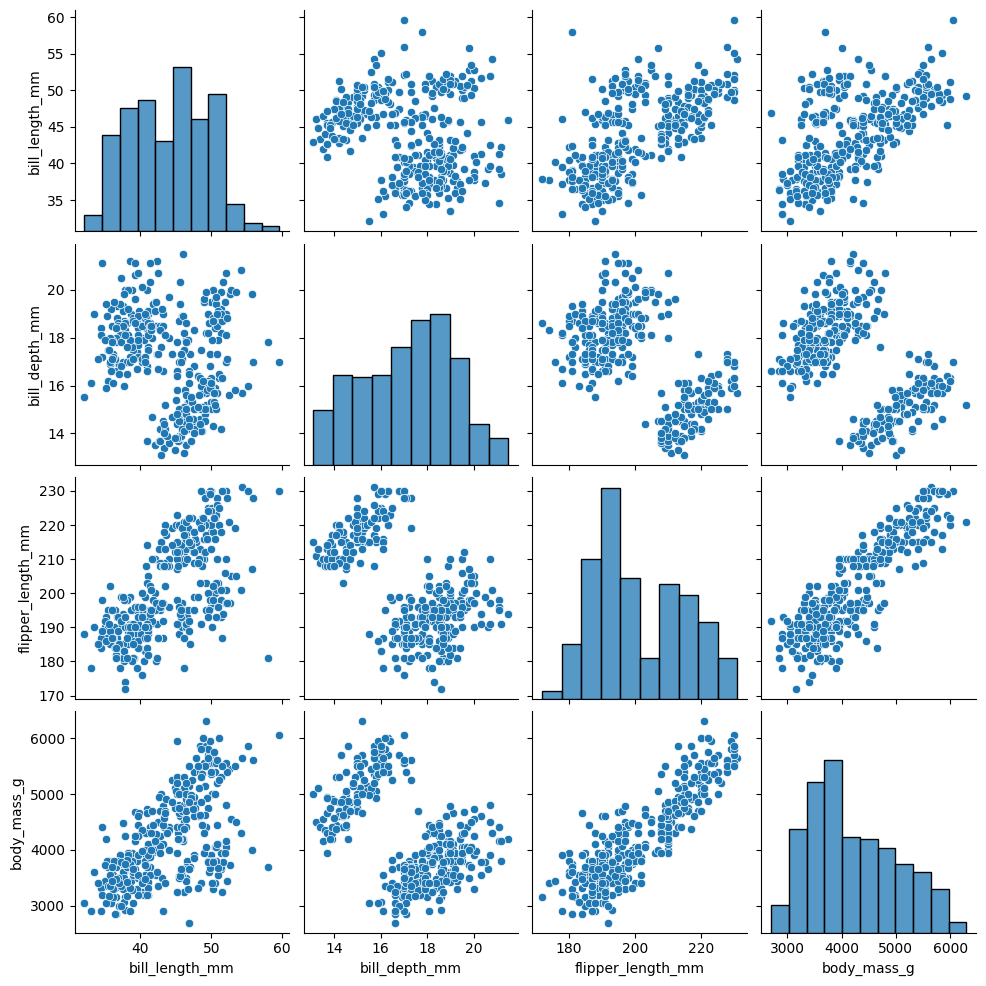

In [21]:
# Utilizando pairplot para análise descritiva
sns.pairplot(penguins_clean)

Observando os gráficos é possível notar a separação de clusters em alguns deles, porém, não são em todas as visualizações que é possível observar os três clusters claramente, um exemplo forte disso é no gráfico de dispersão entre 'bill_depht' e 'body_mass_g', onde há uma separação aparente de dois grupos.

# 3 - Realize a padronização dos dados e visualize os dados.

In [22]:
# Padronizando os dados
scaler = StandardScaler()
penguins_pradonizados = scaler.fit_transform(penguins_clean)

penguins_pradonizados

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]],
      shape=(333, 4))

# 4 - Aplique o algoritmo do k means escolhendo o numero de clusters como igual a 3, que é que a quantidade de espécies que temos na base.

In [23]:
# Aplicado o K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(penguins_pradonizados)

labels = kmeans.labels_
centroides = kmeans.cluster_centers_

# 5 - Construa pelo 2 matriz de dispersão como realizada em aula indicando os pontos e centroides.

**Comece usando x='bill_length_mm' e y='bill_depth_mm' para analisar o primeiro gráfico e em seguida escolha outras variaveis para o segundo.**

In [27]:
centroides_original = scaler.inverse_transform(centroides)

In [29]:
# Criando um df com os dados originais e  rótulos de cluster
penguins_clusters = pd.DataFrame({
    'bill_length_mm':penguins['bill_length_mm'],
    'bill_depth_mm': penguins['bill_depth_mm'],     
    'flipper_length_mm': penguins['flipper_length_mm'],
    'body_mass_g': penguins['body_mass_g'],
    'cluster': labels.astype(str)
})

# Plotar os pontos de dados coloridos
fig = px.scatter(penguins_clusters, x='bill_length_mm', y='bill_depth_mm', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters de Perfil de Pinguins')

# Adicionar os centroides ao gráfico
fig.add_scatter(x=centroides_original[:, 0], y=centroides_original[:, 1],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='Comprimento do bico (mm)', yaxis_title='Profundidade do bico (mm)',
                  legend_title='Cluster')
fig.show()

In [37]:
# Criando um df com os dados originais e  rótulos de cluster
penguins_clusters = pd.DataFrame({
    'bill_length_mm':penguins['bill_length_mm'],
    'bill_depth_mm': penguins['bill_depth_mm'],     
    'flipper_length_mm': penguins['flipper_length_mm'],
    'body_mass_g': penguins['body_mass_g'],
    'cluster': labels.astype(str)
})

# Plotar os pontos de dados coloridos
fig = px.scatter(penguins_clusters, x='body_mass_g', y='flipper_length_mm', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters de Perfil de Pinguins')

# Adicionar os centroides ao gráfico
fig.add_scatter(x=centroides_original[:, 3], y=centroides_original[:, 2],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='Comprimento do bico (mm)', yaxis_title='Profundidade do bico (mm)',
                  legend_title='Cluster')
fig.show()

# 6 - Pesquise mais 3 utilidades de aplicações de algoritmos de clusterização e cite abaixo:

1. Detecção de anomalias

- Exemplo: em segurança bancária, transações que não se encaixam em nenhum cluster de comportamento “normal” podem ser potenciais fraudes.

- O algoritmo aprende os “padrões” e qualquer ponto muito distante pode ser sinal de atividade suspeita.

2. Organização automática de documentos ou imagens

- Exemplo: em pesquisa acadêmica, artigos científicos podem ser agrupados automaticamente por similaridade de conteúdo, sem precisar de etiquetas manuais.

- Em visão computacional, fotos podem ser agrupadas por características visuais (ex.: separar tipos de paisagens).

3. Descoberta de padrões em saúde

- Exemplo: clusterizar pacientes com base em dados clínicos (pressão, exames, sintomas) pode revelar subgrupos de doenças que não estavam claramente definidos.

- Isso ajuda médicos a identificar perfis de risco ou respostas diferentes a tratamentos.